In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
data = pd.read_excel("COCA60000FULL.xlsx")
data["word"] = data["word"].str.replace(' ', '')

data

,RANK #,PoS,word,TOTAL,SPOKEN,FICTION,MAGAZINE,NEWSPAPER,ACADEMIC
0,1,A,the,23782115,4183469,4531786,4875815,4646517,5544528
1,2,V,be,16711569,4873288,3173845,2989059,2926800,2748577
2,3,C,and,11654439,2347151,2188166,2388111,2130798,2600213
3,4,I,of,11155504,1857279,1630728,2329089,2050072,3288336
4,5,A,a,10999596,2110287,2125067,2496150,2331699,1936393
...,...,...,...,...,...,...,...,...,...
60018,60020,N,hecatomb,20,0,2,2,0,16
60019,60021,N,sideslip,19,0,16,3,0,0
60020,60022,N,gaoler,23,0,1,0,0,22
60021,60023,N,carcinoid,21,0,0,0,0,21


In [4]:
data_selected = data[data["word"].str.len() == 5]
data_selected = data_selected.sort_values(by="TOTAL", axis=0, ascending=True)
data_selected

,RANK #,PoS,word,TOTAL,SPOKEN,FICTION,MAGAZINE,NEWSPAPER,ACADEMIC
57873,57875,J,unhip,18,0,7,4,6,1
59267,59269,R,roily,19,0,11,7,0,1
58747,58749,J,topsy,19,4,10,2,1,2
58806,58808,N,shoat,19,0,14,2,2,1
58818,58820,J,homed,19,0,10,4,0,5
...,...,...,...,...,...,...,...,...,...
55,56,V,think,838695,423892,193081,88312,93525,39885
52,53,E,there,846483,301556,155571,135904,139865,113587
45,46,I,about,952604,328762,178533,163092,163636,118581
40,41,V,would,1000182,251284,257792,166384,178690,146032


In [14]:
data_selected["weight"] = data_selected["TOTAL"] / data_selected["TOTAL"].sum()
data_selected.tail(400)

,RANK #,PoS,word,TOTAL,SPOKEN,FICTION,MAGAZINE,NEWSPAPER,ACADEMIC,weight
2166,2167,V,shout,18603,1129,12310,2530,1995,639,0.000430
2067,2068,N,honor,18613,4101,3969,3324,3875,3344,0.000431
2062,2063,V,lower,18645,2113,5983,5061,2900,2588,0.000431
2057,2058,R,first,18661,2392,6872,4278,3046,2073,0.000432
2041,2042,N,taste,18798,2044,4103,5870,4663,2118,0.000435
...,...,...,...,...,...,...,...,...,...,...
55,56,V,think,838695,423892,193081,88312,93525,39885,0.019403
52,53,E,there,846483,301556,155571,135904,139865,113587,0.019584
45,46,I,about,952604,328762,178533,163092,163636,118581,0.022039
40,41,V,would,1000182,251284,257792,166384,178690,146032,0.023139


In [15]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

x_width = 10
n_common = 3000
c = x_width * (-0.5 + n_common / data_selected.shape[0])
xs = np.linspace(c - x_width / 2, c + x_width / 2, data_selected.shape[0])
xs = sigmoid(xs)
data_selected["proability"] = xs

In [16]:
data_selected

,RANK #,PoS,word,TOTAL,SPOKEN,FICTION,MAGAZINE,NEWSPAPER,ACADEMIC,weight,proability
57873,57875,J,unhip,18,0,7,4,6,1,4.164350e-07,0.058522
59267,59269,R,roily,19,0,11,7,0,1,4.395703e-07,0.058655
58747,58749,J,topsy,19,4,10,2,1,2,4.395703e-07,0.058788
58806,58808,N,shoat,19,0,14,2,2,1,4.395703e-07,0.058921
58818,58820,J,homed,19,0,10,4,0,5,4.395703e-07,0.059055
...,...,...,...,...,...,...,...,...,...,...,...
55,56,V,think,838695,423892,193081,88312,93525,39885,1.940344e-02,0.999263
52,53,E,there,846483,301556,155571,135904,139865,113587,1.958362e-02,0.999265
45,46,I,about,952604,328762,178533,163092,163636,118581,2.203876e-02,0.999267
40,41,V,would,1000182,251284,257792,166384,178690,146032,2.313949e-02,0.999268


In [ ]:
def get_frequency_based_priors(n_common=3000, width_under_sigmoid=10):
    """
    We know that that list of wordle answers was curated by some human
    based on whether they're sufficiently common. This function aims
    to associate each word with the likelihood that it would actually
    be selected for the final answer.
    Sort the words by frequency, then apply a sigmoid along it.
    """
    freq_map = get_word_frequencies()
    words = np.array(list(freq_map.keys()))
    freqs = np.array([freq_map[w] for w in words])
    arg_sort = freqs.argsort()
    sorted_words = words[arg_sort]

    # We want to imagine taking this sorted list, and putting it on a number
    # line so that it's length is 10, situating it so that the n_common most common
    # words are positive, then applying a sigmoid
    x_width = width_under_sigmoid
    c = x_width * (-0.5 + n_common / len(words))
    xs = np.linspace(c - x_width / 2, c + x_width / 2, len(words))
    priors = dict()
    for word, x in zip(sorted_words, xs):
        priors[word] = sigmoid(x)
    return priors

In [6]:
data_selected[ data_selected["word"] == "hello" ]

,RANK #,PoS,word,TOTAL,SPOKEN,FICTION,MAGAZINE,NEWSPAPER,ACADEMIC,weight
18252,18253,N,hello,559,90,301,80,66,22,0.000013
2251,2252,U,hello,17783,10117,6054,845,649,118,0.000411


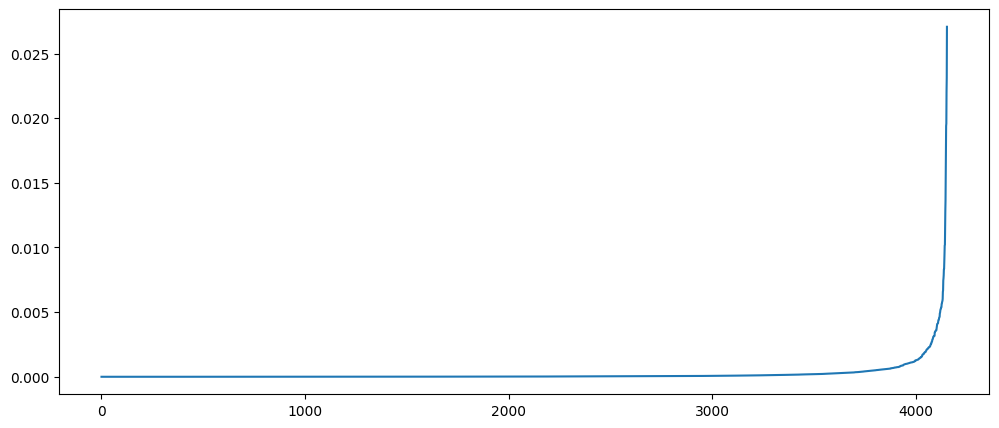

In [7]:
data = data_selected["weight"].tolist()
plt.figure(figsize=(12, 5))
plt.plot(data)
plt.show()

In [ ]:
data_selected["weight_sigmoid"] = sigmoid(data_selected["weight"])
data_selected

In [9]:
sum = data_selected["weight"].sum()
for i in 

1.0

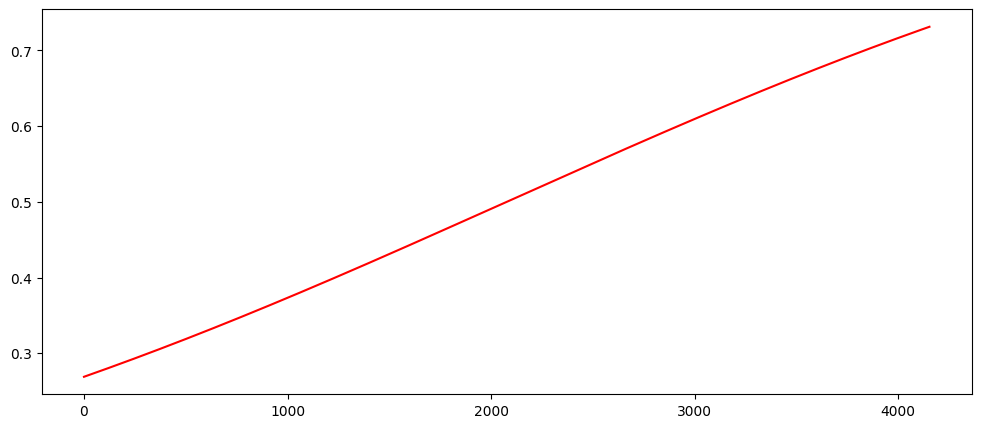

In [36]:
weight_sigmoid = data_selected["weight_sigmoid"]
weight_sigmoid = weight_sigmoid.sort_values(ascending=True).tolist()
# print(weight)
plt.figure(figsize=(12, 5))
plt.plot(weight_sigmoid, 'r')
plt.show()

In [87]:
data = []

with open("words_freqs_full.txt") as f:
    cnt = 0
    for line in f:
        cur = line.split(' ')
        word = cur[0]
        ave = 0
        cur = cur[1:]
        nums = []
        
        for num in cur:
            nums.append( float(num) )
        cur = nums
        
        if len(cur) == 0:
            ave = 0
        else: 
            ave = sum(cur) / len(cur)
        
        data.append([word, ave])
    
    data = pd.DataFrame(data, columns=["word", "average"])

data

,word,average
0,aahed,7.934435e-09
1,aalii,7.786216e-09
2,aargh,9.733998e-09
3,aarti,1.168085e-08
4,abaca,1.931957e-07
...,...,...
12967,zuzim,1.165401e-08
12968,zygal,3.032922e-09
12969,zygon,1.593215e-08
12970,zymes,9.681967e-09


In [88]:
data.sort_values(by="average", axis=0, ascending=True)

,word,average
5256,hwyls,0.000000
8746,qophs,0.000000
12901,zexes,0.000000
12840,yrivd,0.000000
12255,vutty,0.000000
...,...,...
12622,would,0.001454
7813,other,0.001684
11310,there,0.001790
11304,their,0.003142
